Huifang Wang, 17/04/2020//
ConvidH: RIS+PSE proposed by Viktor Jisa//
Realization: TNG, the four :)

In [2]:
import numpy as np

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
class CovidH_model1_VJ2:
    nvar = 5
    lamda = 1./80./365.
    mu = 1./80./365.
    alpha = 0.2
    gamma =0.1
    phi0 = 1.
    bGamma = 1
    sigma= 30.
    u0 = 0.1
    beta0= 0.4
    h = 0.
    Jb =0.
    tau = 1
    c=1
    #cvar = numpy.array([0,1], dtype=numpy.int32)
    def _fu(self,u):
        if self.Jb ==0:
            return 0
        if self.Jb > 0:
            return np.tanh(2*np.abs(u))#np.exp(u)/(np.exp(u)+1)

    def _numpy_dfun(self, state_variables):
        
        y = state_variables
        ydot = np.empty_like(state_variables)
        
        ydot[0] = self.lamda - y[2]*y[1]*y[0]-self.mu * y[0]
        ydot[1] = (y[2]*y[0]-self.alpha)*y[1]-self.mu*y[1]
        ydot[2] = -(y[2]-self.beta0) -self.Jb*y[2] - self.gamma*(y[3]-self.phi0)
        ydot[3] = ((-(y[3]-(self.phi0-self.h*self.Jb)))-self.c*self._fu(y[4]))/self.tau
        ydot[4] = 1/self.sigma*(- self.bGamma*(y[2]-self.beta0)+self.u0*(self.Jb>0))
        
        #print(self._fu(y[4]))
        
        
        return ydot

    
    def sim(self, params):
        
        x = np.zeros([params['nt'],self.nvar])
        ts = [0.0]
        for t in range(params['nt']):
            if (t == 0):
                x[t] = params['x_init'] # + params['time_step'] * self.dx(params['x_init'], params['z_init'], params['I1'])
            else:
                self.Jb = params['Jb'][t-1]
                #self.Jg = params['Jg'][t-1]
                
                x[t] = x[t - 1] + params['time_step'] * self._numpy_dfun(x[t-1])
                if params['Jb'][t]<params['Jb'][t-1]:
                   x[t,4]=x[t-1,4]/2
                ts.append(ts[-1] + params['time_step'])
        return ts, x

In [5]:
class CovidH_model1_Group:
    nvar = 5
    lamda = np.array([1./80./365./2.,1./80./365./2.])
    mu = 1./80./365.
    alpha = 0.2
    gamma =0.1
    phi0 = np.array([1.,1])
    bGamma = np.array([0.5,1.])
    sigma= 30.
    u0 = 0.1
    beta0= 0.4
    h = 0.
    Jb =0.
    tau = 1
    Jg = 0
    c=[1,1]
    #cvar = numpy.array([0,1], dtype=numpy.int32)
    def _fu(self,u):
        if self.Jb ==0:
            return 0
        if self.Jb > 0:
            return np.tanh(2*abs(u))#np.exp(u)/(np.exp(u)+1)

    def _numpy_dfun(self, state_variables, ing):
        
        y = state_variables
        ydot = np.empty_like(state_variables[ing])
        ydot[0] = self.lamda[ing] - y[ing,2]*np.sum(y[:,1])*y[ing,0]-self.mu * y[ing,0]
        ydot[1] = (y[ing,2]*np.sum(y[:,0])-self.alpha)*y[ing,1]-self.mu*y[ing,1]
        ydot[2] = -(y[ing,2]-self.beta0) -self.Jb*y[ing,2] - self.gamma*(y[ing,3]-self.phi0[ing])
        ydot[3] = ((-(y[ing,3]-(self.phi0[ing]-self.h*self.Jb)))-self.c[ing]*self._fu(y[ing,4]))/self.tau
        ydot[4] = 1/self.sigma*(- self.bGamma[ing]*(y[ing,2]-self.beta0)+self.u0*(self.Jb>0))
        
        
        return ydot
    
    
    
    def sim(self, params):
        
        x = np.zeros([params['nt'],params['ng'],self.nvar])
        ts = [0.0]
        for t in range(params['nt']):
            for ing in range(params['ng']):
                if (t == 0):
                    x[t,ing] = params['x_init'][ing] # + params['time_step'] * self.dx(params['x_init'], params['z_init'], params['I1'])
                else:
                    self.Jb = params['Jb'][t-1]
                    self.Jg = params['Jg'][t-1]
                
                    x[t,ing] = x[t - 1,ing] + params['time_step'] * self._numpy_dfun(x[t-1],ing)
                    if params['Jb'][t]<params['Jb'][t-1]:
                       x[t,ing,4]=x[t-1,ing,4]/2
            if t>0:
                ts.append(ts[-1] + params['time_step'])
        return ts, x

In [6]:
from datetime import date

In [7]:
startdate = date(2020,2,14)
march14 = date(2020,3,14)
April14 = date(2020,4,14)
May11 = date(2020,5,11)
June14=date(2020,6,14)
July14=date(2020,7,14)
Aug14=date(2020,8,14)
Sep14=date(2020,9,14)
tickV=[startdate, march14,April14,May11,June14,July14,Aug14,Sep14]
dlabel=['14/02','14/03','14/04','11/05','14/06','14/07','14/08','14/09']
index_tind = []
for itickV in tickV:
    index_tind.append((itickV-startdate).days)


In [8]:
def update_Jb(Jb, time_step,tsdate,tfdate,scaleJ=1):
    Jb[int(tsdate/time_step):int(tfdate/time_step)] = np.ones(int((tfdate-tsdate)/time_step))*scaleJ
    return Jb


In [9]:
import matplotlib.gridspec as gridspec

## Simuation with 2 groups


/Users/huifang.wang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/huifang.wang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/huifang.wang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes cur

(0.0, 239.89999999999065)

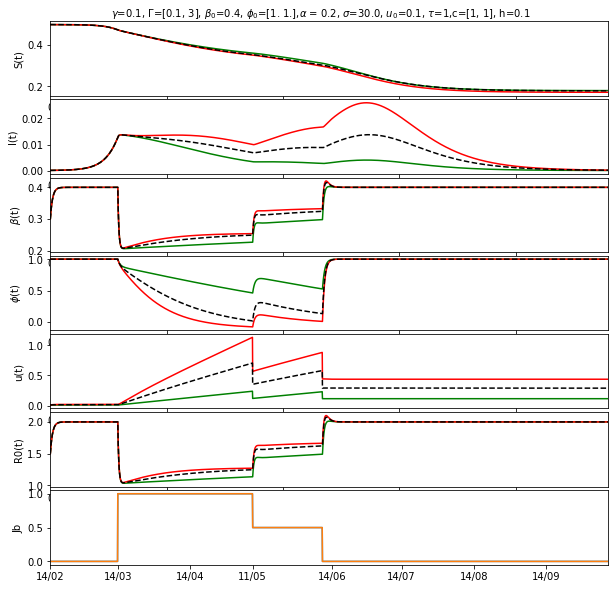

In [16]:
I0 = 0.0001
S0= (1-I0)/2.
x0 = np.array([[S0,I0/2.,0.3,1,0.01],[S0,I0/2.,0.3,1,0.01]])
ndays = 240
time_step = 0.1
nt = int(ndays/time_step)


params = {'nt': nt,'ng':2,'x_init':x0,'time_step':time_step}
params['Jb'] = np.zeros(nt)
params['Jg'] = np.zeros(nt)

'''
params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[1],index_tind[3],scaleJ=1)
params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[3],ndays,scaleJ=0.75)
params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[3]+14,ndays,scaleJ=0.5)
params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[3]+30,ndays,scaleJ=0.25)
params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[3]+30+30,ndays,scaleJ=0)
'''
params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[1],index_tind[3],scaleJ=1)
params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[3],ndays,scaleJ=0.5)
#params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[3]+30,ndays,scaleJ=0.5)
params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[3]+30,ndays,scaleJ=0)

#params['Jg']=update_Jb(params['Jg'],params['time_step'],index_tind[1],index_tind[3],scaleJ=1)
#params['Jg']=update_Jb(params['Jg'],params['time_step'],index_tind[3],ndays,scaleJ=0.75)
#params['Jg']=update_Jb(params['Jg'],params['time_step'],index_tind[3]+14,ndays,scaleJ=0.5)
#params['Jg']=update_Jb(params['Jg'],params['time_step'],index_tind[3]+30,ndays,scaleJ=0.25)
#params['Jg']=update_Jb(params['Jg'],params['time_step'],index_tind[3]+30+14,ndays,scaleJ=0)


#params['Jg']=update_Jb(params['Jg'],params['time_step'],index_tind[3],ndays,scaleJ=0.5)


model = CovidH_model1_Group()
#model.u0 = 0.2
model.gamma = 0.1
model.h = 0.1
model.bGamma = [0.1,3]
#model.h = 0.5
ts,x = model.sim(params=params)


fig = plt.figure(figsize =[10,10])

gs = gridspec.GridSpec(7,1,hspace=0.05)

    
fig.suptitle(f'$\\gamma$={model.gamma}, $\\Gamma$={model.bGamma}, $\\beta_0$={model.beta0}, $\\phi_0$={model.phi0},$\\alpha$ = {model.alpha}, $\\sigma$={model.sigma}, $u_0$={model.u0}, $\\tau$={model.tau},c={model.c}, h={model.h}', y=0.9, fontsize=10)
colorI = ['green','red','black']
#ax1=subplot(711)
for ing in np.arange(2):
    ax1=subplot(gs[0,0])
    ax1.plot(ts,x[:,ing,0],color=colorI[ing]); 
    ax1.set_ylabel('S(t)')
    ax1.set_xlim([ts[0],ts[-1]])
    ax2=subplot(gs[1,0])
    ax2.plot(ts,x[:,ing,1],color=colorI[ing]);
    ax2.set_ylabel(f'I(t)')
    ax2.set_xlim([ts[0],ts[-1]])
    ax3=subplot(gs[2,0])
    ax3.plot(ts,x[:,ing,2],color=colorI[ing]);
    ax3.set_ylabel(r'$\beta$(t)')
    ax3.set_xlim([ts[0],ts[-1]])
    ax4=subplot(gs[3,0])
    ax4.plot(ts,x[:,ing,3],color=colorI[ing]);
    ax4.set_ylabel(r'$\phi$(t)')
    ax4.set_xlim([ts[0],ts[-1]])
    ax5=subplot(gs[4,0])
    ax5.plot(ts,x[:,ing,4],color=colorI[ing]);
    ax5.set_ylabel(f'u(t)')
    ax5.set_xlim([ts[0],ts[-1]])
    ax6=subplot(gs[5,0])
    R0 = np.sum(model.lamda)/(model.mu*(model.alpha+model.mu))*x[:,ing,2]
    ax6.plot(ts,R0,color=colorI[ing])
    ax6.set_ylabel(r'R0(t)')
    ax6.set_xlim([ts[0],ts[-1]])
    
    ax7= subplot(gs[6,0])
    lineJb=ax7.plot(ts,params['Jb'])
    #lineJg=ax7.plot(ts,params['Jg'],label='Jg')
    ax7.set_xticks(index_tind)
    ax7.set_xticklabels(dlabel)
    ax7.set_ylabel('Jb')
    #ax7.legend(loc=1)
    ax7.set_xlim([ts[0],ts[-1]])

'''Draw the one population
'''

x0S = np.array([1-I0,I0,0.3,1,0.01])
params1 = {'nt': nt,'x_init':x0S,'time_step':time_step}
params1['Jb']=params['Jb']
model1 = CovidH_model1_VJ2()
model1.gamma=model.gamma
model1.bGamma = np.mean(model.bGamma)
model1.h=model.h
ts,x1 = model1.sim(params=params1)


ing=2

ax1.plot(ts,x1[:,0]/2,color='black',linestyle='--'); 


ax2.plot(ts,x1[:,1]/2,color='black',linestyle='--');

ax3.plot(ts,x1[:,2],color='black',linestyle='--');

ax4.plot(ts,x1[:,3],color='black',linestyle='--');

ax5.plot(ts,x1[:,4],color='black',linestyle='--');

R0 = np.sum(model.lamda)/(model.mu*(model.alpha+model.mu))*x1[:,2]
ax6.plot(ts,R0,color='black',linestyle='--')
ax6.set_ylabel(r'R0(t)')
ax6.set_xlim([ts[0],ts[-1]])


In [11]:
ydot

NameError: name 'ydot' is not defined

/Users/huifang.wang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/huifang.wang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/huifang.wang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes cur

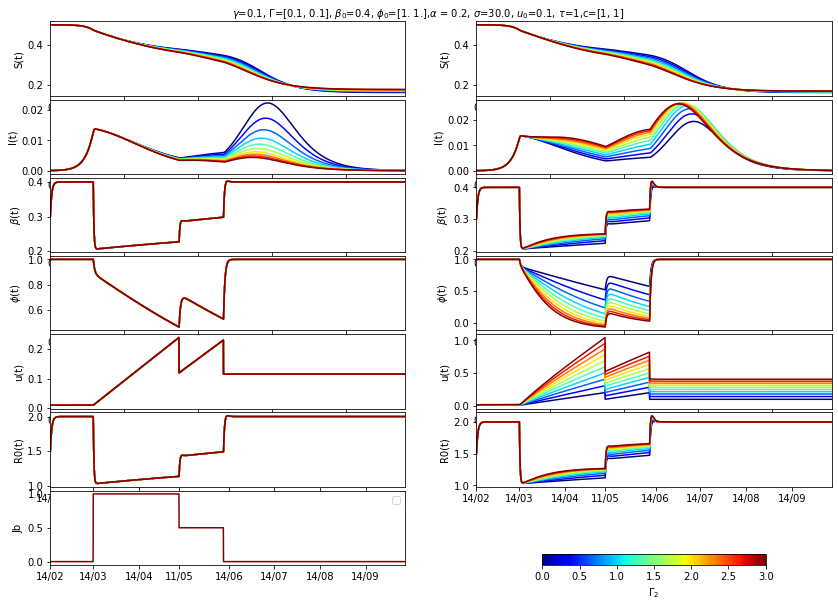

In [14]:
I0 = 0.0001
S0= (1-I0)/2.
x0 = np.array([[S0,I0/2.,0.3,1,0.01],[S0,I0/2.,0.3,1,0.01]])
ndays = 240
time_step = 0.1
nt = int(ndays/time_step)


params = {'nt': nt,'ng':2,'x_init':x0,'time_step':time_step}
params['Jb'] = np.zeros(nt)
params['Jg'] = np.zeros(nt)

params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[1],index_tind[3],scaleJ=1)
params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[3],ndays,scaleJ=0.5)
#params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[3]+30,ndays,scaleJ=0.5)
params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[3]+30,ndays,scaleJ=0)

max_para = 1
min_para = 0.
step_para = 0.1
vparam=np.arange(min_para,max_para,0.1)
n = len(vparam)
mycmap = plt.cm.jet
colors = mycmap(np.linspace(0,1,n))
fig.suptitle(f'$\\gamma$={model.gamma}, $\\Gamma$={model.bGamma}, $\\beta_0$={model.beta0}, $\\phi_0$={model.phi0},$\\alpha$ = {model.alpha}, $\\sigma$={model.sigma}, $u_0$={model.u0}, $\\tau$={model.tau}', fontsize=10)
model = CovidH_model1_Group()
#model.u0 = 0.2
model.gamma = 0.1
model.h = 0.1
model.bGamma = [0.1,0.1];


fig = plt.figure(figsize =[14,10])

gs = gridspec.GridSpec(7,2,hspace=0.05)
fig.suptitle(f'$\\gamma$={model.gamma}, $\\Gamma$={model.bGamma}, $\\beta_0$={model.beta0}, $\\phi_0$={model.phi0},$\\alpha$ = {model.alpha}, $\\sigma$={model.sigma}, $u_0$={model.u0}, $\\tau$={model.tau},c={model.c}', y=0.9, fontsize=10)


for ib, ipara in enumerate(vparam):
    c = colors[ib];
    model.bGamma = [0.1,ipara*3];
    ts,x = model.sim(params=params)

    #ax1=subplot(711)
    for ing in np.arange(2):
        ax1=subplot(gs[0,ing])
        ax1.plot(ts,x[:,ing,0],color=c); 
        ax1.set_ylabel('S(t)')
        ax1.set_xlim([ts[0],ts[-1]])
        ax2=subplot(gs[1,ing])
        ax2.plot(ts,x[:,ing,1],color=c);
        ax2.set_ylabel(f'I(t)')
        ax2.set_xlim([ts[0],ts[-1]])
        ax3=subplot(gs[2,ing])
        ax3.plot(ts,x[:,ing,2],color=c);
        ax3.set_ylabel(r'$\beta$(t)')
        ax3.set_xlim([ts[0],ts[-1]])
        ax4=subplot(gs[3,ing])
        ax4.plot(ts,x[:,ing,3],color=c);
        ax4.set_ylabel(r'$\phi$(t)')
        ax4.set_xlim([ts[0],ts[-1]])
        ax5=subplot(gs[4,ing])
        ax5.plot(ts,x[:,ing,4],color=c);
        ax5.set_ylabel(f'u(t)')
        ax5.set_xlim([ts[0],ts[-1]])
        ax6=subplot(gs[5,ing])
        R0 = np.sum(model.lamda)/(model.mu*(model.alpha+model.mu))*x[:,ing,2]
        ax6.plot(ts,R0,color=c)
        ax6.set_ylabel(r'R0(t)')
        ax6.set_xlim([ts[0],ts[-1]])
        ax6.set_xticks(index_tind)
        ax6.set_xticklabels(dlabel)
        ax6.set_xlim([ts[0],ts[-1]])


ax7= subplot(gs[6,0])
lineJb=ax7.plot(ts,params['Jb'],color=c)
        #lineJg=ax7.plot(ts,params['Jg'],label='Jg')
ax7.set_xticks(index_tind)
ax7.set_xticklabels(dlabel)
ax7.set_ylabel('Jb')
ax7.legend(loc=1)
ax7.set_xlim([ts[0],ts[-1]])
ax7= subplot(gs[6,1])
sm = plt.cm.ScalarMappable(cmap=mycmap,norm=plt.Normalize(vmin=min_para, vmax=max_para*3));
ax7.axis('off')
clb=plt.colorbar(mappable=sm,orientation='horizontal')
clb.set_label('$\\Gamma_2$')

/Users/huifang.wang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/huifang.wang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/huifang.wang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes cur

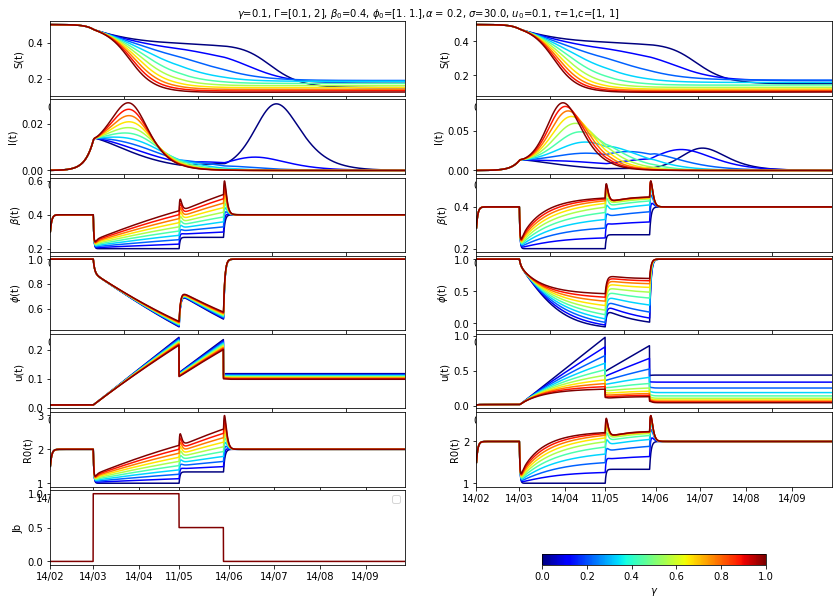

In [15]:
I0 = 0.0001
S0= (1-I0)/2.
x0 = np.array([[S0,I0/2.,0.3,1,0.01],[S0,I0/2.,0.3,1,0.01]])
ndays = 240
time_step = 0.1
nt = int(ndays/time_step)


params = {'nt': nt,'ng':2,'x_init':x0,'time_step':time_step}
params['Jb'] = np.zeros(nt)
params['Jg'] = np.zeros(nt)

params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[1],index_tind[3],scaleJ=1)
params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[3],ndays,scaleJ=0.5)
#params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[3]+30,ndays,scaleJ=0.5)
params['Jb']=update_Jb(params['Jb'],params['time_step'],index_tind[3]+30,ndays,scaleJ=0)

max_para = 1
min_para = 0.
step_para = 0.1
vparam=np.arange(min_para,max_para,0.1)
n = len(vparam)
mycmap = plt.cm.jet
colors = mycmap(np.linspace(0,1,n))
fig.suptitle(f'$\\gamma$={model.gamma}, $\\Gamma$={model.bGamma}, $\\beta_0$={model.beta0}, $\\phi_0$={model.phi0},$\\alpha$ = {model.alpha}, $\\sigma$={model.sigma}, $u_0$={model.u0}, $\\tau$={model.tau}', fontsize=10)
model = CovidH_model1_Group()
#model.u0 = 0.2
model.gamma = 0.1
model.h = 0.1
model.bGamma = [0.1,2];


fig = plt.figure(figsize =[14,10])

gs = gridspec.GridSpec(7,2,hspace=0.05)
fig.suptitle(f'$\\gamma$={model.gamma}, $\\Gamma$={model.bGamma}, $\\beta_0$={model.beta0}, $\\phi_0$={model.phi0},$\\alpha$ = {model.alpha}, $\\sigma$={model.sigma}, $u_0$={model.u0}, $\\tau$={model.tau},c={model.c}', y=0.9, fontsize=10)


for ib, ipara in enumerate(vparam):
    c = colors[ib];
    model.gamma = ipara;
    ts,x = model.sim(params=params)

    #ax1=subplot(711)
    for ing in np.arange(2):
        ax1=subplot(gs[0,ing])
        ax1.plot(ts,x[:,ing,0],color=c); 
        ax1.set_ylabel('S(t)')
        ax1.set_xlim([ts[0],ts[-1]])
        ax2=subplot(gs[1,ing])
        ax2.plot(ts,x[:,ing,1],color=c);
        ax2.set_ylabel(f'I(t)')
        ax2.set_xlim([ts[0],ts[-1]])
        ax3=subplot(gs[2,ing])
        ax3.plot(ts,x[:,ing,2],color=c);
        ax3.set_ylabel(r'$\beta$(t)')
        ax3.set_xlim([ts[0],ts[-1]])
        ax4=subplot(gs[3,ing])
        ax4.plot(ts,x[:,ing,3],color=c);
        ax4.set_ylabel(r'$\phi$(t)')
        ax4.set_xlim([ts[0],ts[-1]])
        ax5=subplot(gs[4,ing])
        ax5.plot(ts,x[:,ing,4],color=c);
        ax5.set_ylabel(f'u(t)')
        ax5.set_xlim([ts[0],ts[-1]])
        ax6=subplot(gs[5,ing])
        R0 = np.sum(model.lamda)/(model.mu*(model.alpha+model.mu))*x[:,ing,2]
        ax6.plot(ts,R0,color=c)
        ax6.set_ylabel(r'R0(t)')
        ax6.set_xlim([ts[0],ts[-1]])
        ax6.set_xticks(index_tind)
        ax6.set_xticklabels(dlabel)
        ax6.set_xlim([ts[0],ts[-1]])


ax7= subplot(gs[6,0])
lineJb=ax7.plot(ts,params['Jb'],color=c)
        #lineJg=ax7.plot(ts,params['Jg'],label='Jg')
ax7.set_xticks(index_tind)
ax7.set_xticklabels(dlabel)
ax7.set_ylabel('Jb')
ax7.legend(loc=1)
ax7.set_xlim([ts[0],ts[-1]])
ax7= subplot(gs[6,1])
sm = plt.cm.ScalarMappable(cmap=mycmap,norm=plt.Normalize(vmin=min_para, vmax=max_para));
ax7.axis('off')
clb=plt.colorbar(mappable=sm,orientation='horizontal')
clb.set_label('$\\gamma$')